In [70]:
#Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#Import Matches and Deliveries dataset into dataframes
matches_original = pd.read_csv('data\matches.csv')
deliveries_original = pd.read_csv('data\deliveries.csv')

In [93]:
#Copy dataframes to another temp dataframes so that if we have to revert, we have original dataframe available
matches = matches_original.copy()
deliveries = deliveries_original.copy()

In [ ]:
#Set max column width so that it doesn't truncate the columns on display
pd.options.display.max_colwidth = -1

In [94]:
#Check number of Rows and Columns in matches DF. Also, we will take a look at Column names and their type
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [95]:
#Check number of Rows and Columns in matches DF. Also, we will take a look at Column names and their type
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [125]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [171]:
df = matches
df['win_by_runs'] = df['win_by_runs'].astype(int)
df['win_by_wickets'] = df['win_by_wickets'].astype(int)

df_plot1 = df[df['win_by_runs'] > 0].groupby('season').agg({'id':{'bat_first': 'count'}}).reset_index()
df_plot2 = df[df['win_by_wickets'] > 0].groupby('season').agg({'id':{'bowl_first': 'count'}}).reset_index()
df_plot = pd.merge(df_plot1, df_plot2, on = 'season' )
df_plot.columns = ['_'.join(x) for x in df_plot.columns.ravel()]
df_plot.rename(columns = {'season_':'season'},inplace=True)
df_plot

,season,id_bat_first,id_bowl_first
0,2008,24,34
1,2009,27,29
2,2010,31,28
3,2011,33,39
4,2012,34,40
5,2013,37,37
6,2014,22,37
7,2015,32,24
8,2016,21,39
9,2017,26,32


In [176]:
len(df_plot.season)

12

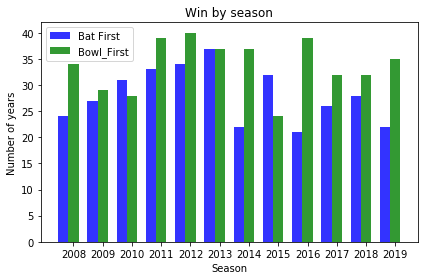

In [186]:
# create plot
fig, ax = plt.subplots()
index = np.arange(len(df_plot))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df_plot.id_bat_first, bar_width,
alpha=opacity,
color='b',
label='Bat First')

rects2 = plt.bar(index + bar_width, df_plot.id_bowl_first, bar_width,
alpha=opacity,
color='g',
label='Bowl_First')

plt.xlabel('Season')
plt.ylabel('Number of years')
plt.title('Win by season')
plt.xticks(index + bar_width, df_plot.season)
plt.legend()

plt.tight_layout()
plt.show()

In [189]:
type(rects1)

matplotlib.container.BarContainer